# Email_spam :- Classification:NaiveBayes

In [34]:
import pandas as pd

In [35]:
df = pd.read_csv("D:\project\emailSpan\spam.csv")

In [36]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
df.shape

(5572, 2)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int64 
 1   Message   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [37]:
df["Category"].unique()

array(['ham', 'spam'], dtype=object)

In [38]:
df["Category"].replace({"ham":1,"spam":0},inplace=True)

In [39]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [40]:
X = df["Message"]
y = df["Category"]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [42]:
X_train.shape

(4457,)

In [43]:
X_test.shape

(1115,)

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
from sklearn.naive_bayes import MultinomialNB

In [46]:
from sklearn.pipeline import Pipeline
clf = Pipeline([("Vectorizer",CountVectorizer()),("model",MultinomialNB())])

In [47]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9919282511210762

In [49]:
y_pred = clf.predict(X_test)
y_pred[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [50]:
y_test[:5]

3245    1
944     1
1044    1
2484    1
812     1
Name: Category, dtype: int64

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

<Axes: >

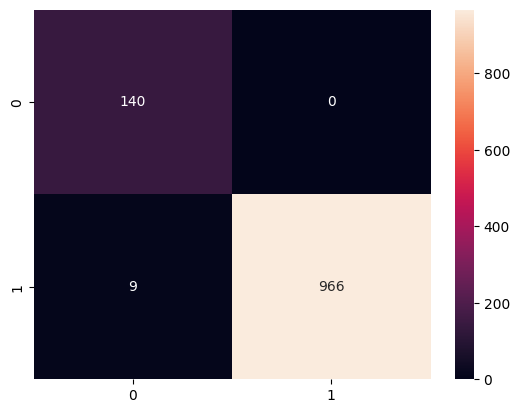

In [58]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True, fmt= "d")